In [21]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

Task:  Task02_Heart
num_train = 20, num_test = 10
Image dimensions:
Train:
(320, 320, 130)
(320, 320, 110)
(320, 320, 120)
(320, 320, 130)
(320, 320, 100)
Test:
(400, 400, 180)
(320, 320, 140)
(400, 400, 180)
(320, 320, 110)
(320, 320, 137)
Image Min-Max values: Image=1999.0,0.0 and label=1.0,0.0
Number of subclasses =  2


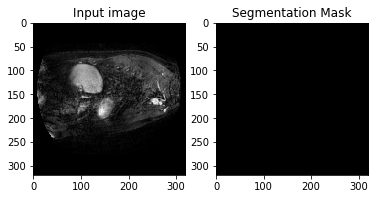



Task:  Task04_Hippocampus
num_train = 260, num_test = 130
Image dimensions:
Train:
(35, 51, 35)
(34, 52, 35)
(36, 52, 38)
(35, 52, 34)
(34, 47, 40)
Test:
(39, 47, 36)
(34, 51, 34)
(34, 53, 27)
(36, 50, 26)
(36, 48, 32)
Image Min-Max values: Image=139.0,2.0 and label=2.0,0.0
Number of subclasses =  3


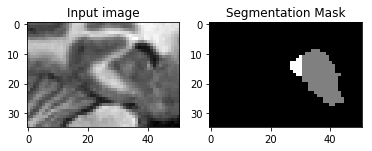



Task:  Task05_Prostate
num_train = 32, num_test = 16
Image dimensions:
Train:
(320, 320, 15, 2)
(320, 320, 20, 2)
(320, 320, 24, 2)
(320, 320, 15, 2)
(320, 320, 20, 2)
Test:
(320, 320, 20, 2)
(320, 320, 20, 2)
(320, 320, 15, 2)
(320, 320, 17, 2)
(320, 320, 20, 2)
Image Min-Max values: Image=3619.0,0.0 and label=2.0,0.0
Number of subclasses =  3


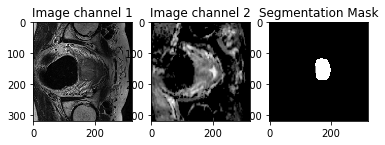

In [28]:
data_path = '../data/'
tasks = os.listdir(data_path)

for task in tasks:
    print('Task: ', task)
    
    # Paths
    path_tr = data_path+task+'/imagesTr'
    path_tr_label = data_path+task+'/labelsTr'
    path_ts = data_path+task+'/imagesTs'
    imglist_tr = glob(path_tr+'/*.gz')
    imglist_tr_label = glob(path_tr_label+'/*.gz')
    imglist_ts = glob(path_ts+'/*.gz')
    print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))
    print('Image dimensions:')
    print('Train:')
    
    # Dimensions
    for img_name in imglist_tr[:5]:
        img = nib.load(img_name)
        print(img.shape)
    print('Test:')
    for img_name in imglist_ts[:5]:
        img = nib.load(img_name)
        print(img.shape)
    
    # Find number of sub labels
    
    # Images
    img = nib.load(imglist_tr[0]).get_fdata()
    label = nib.load(imglist_tr_label[0]).get_fdata()
    print('Image Min-Max values: Image={},{} and label={},{}'.format(img.max(), img.min(), label.max(), label.min()))
    print('Number of subclasses = ', int(label.max())+1)
    if task=='Task05_Prostate':
        ax = plt.subplot('131')
        ax.imshow(img[:,:,10,0], cmap='gray')
        ax.set_title('Image channel 1')
        ax = plt.subplot('132')
        ax.imshow(img[:,:,10,1], cmap='gray')
        ax.set_title('Image channel 2')
        ax = plt.subplot('133')
        ax.imshow(label[:,:,10], cmap='gray')
        ax.set_title('Segmentation Mask')
        plt.show()
    else:
        ax = plt.subplot('121')
        ax.imshow(img[:,:,10], cmap='gray')
        ax.set_title('Input image')
        ax = plt.subplot('122')
        ax.imshow(label[:,:,10], cmap='gray')
        ax.set_title('Segmentation Mask')
        plt.show()
        print('\n')